**Binary Class Classification Using Keras**

**Objective of the project**

Implementing Keras for binary class classification to predict customer churn rate

In [1]:
#Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [2]:
# Loading the dataset

df = pd.read_csv('customer_churn.csv')

**EDA**

In [3]:
# Display top 5 rows

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Shape of the dataset

df.shape

(7043, 21)

In [5]:
#To check data types

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#Check null values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Checking the info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#Checking the stats

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#Checking male customers with Internet Service

total_male_customers = df[df['gender'] == 'Male'].shape[0]
print("Total number of male customers:", total_male_customers)

total_dsl_customers = df[df['InternetService'] == 'DSL'].shape[0]
print("Total number of customers with DSL Internet Service:", total_dsl_customers)

new_customer = df[(df['gender'] == 'Female') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Mailed check')]

Total number of male customers: 3555
Total number of customers with DSL Internet Service: 2421


In [10]:
new_customer = df[(df['gender'] == 'Female') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Mailed check')]

In [11]:
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

new_customer=df[(df['tenure']<10) | (df['TotalCharges']<500)]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


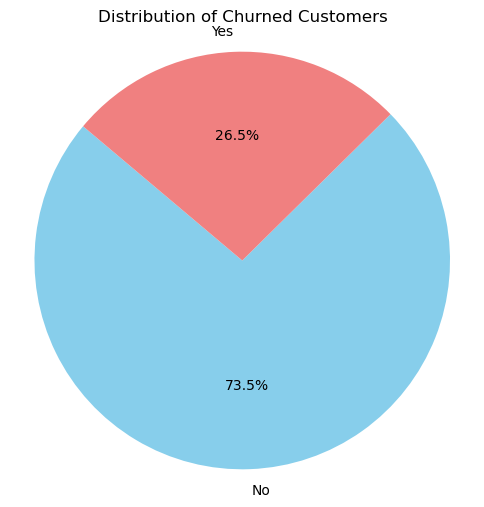

In [12]:
# Plotting pie chart to see the Distribution of Churned Customers

churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Churned Customers')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

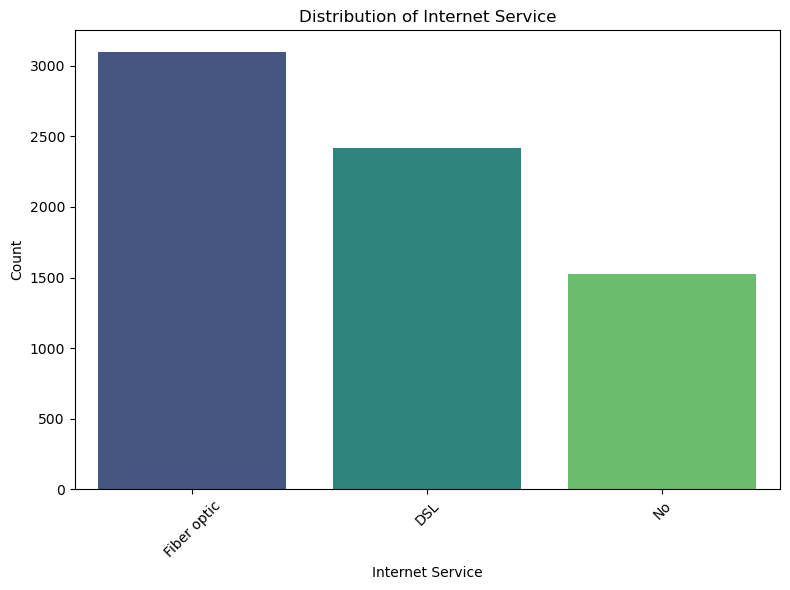

In [13]:
# Count the occurrences of each Internet Service type
internet_counts = df['InternetService'].value_counts()

#Creating a bar plot using Seaborn to see Distribution of Internet Service
plt.figure(figsize=(8, 6))
sns.barplot(x=internet_counts.index, y=internet_counts.values, palette="viridis")
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Distribution of Internet Service')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Preprocessing

X = df[['tenure']].values
y = df['Churn'].map({'Yes': 1, 'No': 0}).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Model 1

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Train the model

history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/150
141/141 [==============================] - 5s 7ms/step - loss: 0.5820 - accuracy: 0.7304 - val_loss: 0.5194 - val_accuracy: 0.7507
Epoch 2/150
141/141 [==============================] - 0s 3ms/step - loss: 0.5331 - accuracy: 0.7304 - val_loss: 0.5033 - val_accuracy: 0.7507
Epoch 3/150
141/141 [==============================] - 1s 4ms/step - loss: 0.5257 - accuracy: 0.7304 - val_loss: 0.4998 - val_accuracy: 0.7507
Epoch 4/150
141/141 [==============================] - 1s 4ms/step - loss: 0.5229 - accuracy: 0.7304 - val_loss: 0.4979 - val_accuracy: 0.7507
Epoch 5/150
141/141 [==============================] - 1s 4ms/step - loss: 0.5210 - accuracy: 0.7304 - val_loss: 0.4968 - val_accuracy: 0.7507
Epoch 6/150
141/141 [==============================] - 1s 4ms/step - loss: 0.5199 - accuracy: 0.7324 - val_loss: 0.4957 - val_accuracy: 0.7471
Epoch 7/150
141/141 [==============================] - 1s 4ms/step - loss: 0.5188 - accuracy: 0.7404 - val_loss: 0.4949 - val_accuracy: 0.7569

In [17]:
# Evaluation

y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

45/45 [==============================] - 0s 2ms/step


In [18]:
confusion_matrix(y_test,y_pred)

array([[914, 122],
       [225, 148]], dtype=int64)

In [19]:
accuracy_score(y_test, y_pred)

0.7537260468417317

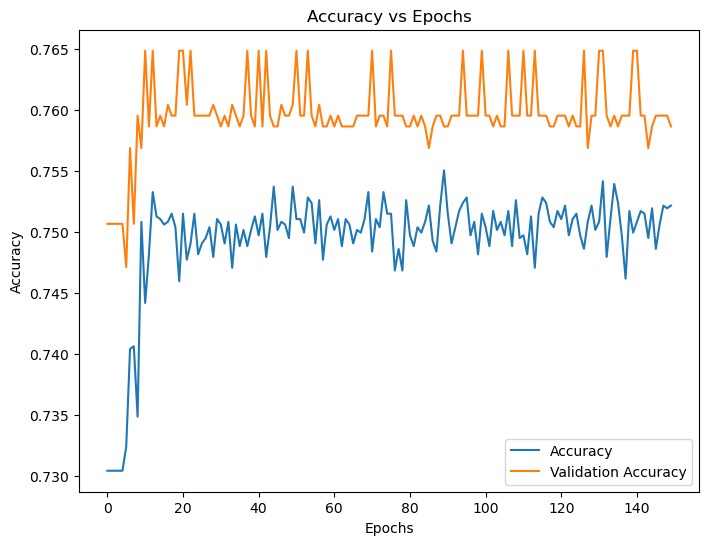

In [20]:
# Plotting the accuracy vs epochs graph

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

In [21]:
# Model 2 with Dropout

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dropout(0.3))  # Dropout layer after input layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))  # Dropout layer after hidden layer
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# Train the model

history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/150
141/141 [==============================] - 2s 6ms/step - loss: 0.7347 - accuracy: 0.5174 - val_loss: 0.6174 - val_accuracy: 0.7507
Epoch 2/150
141/141 [==============================] - 1s 4ms/step - loss: 0.6032 - accuracy: 0.7122 - val_loss: 0.5421 - val_accuracy: 0.7507
Epoch 3/150
141/141 [==============================] - 1s 4ms/step - loss: 0.5721 - accuracy: 0.7182 - val_loss: 0.5164 - val_accuracy: 0.7507
Epoch 4/150
141/141 [==============================] - 1s 4ms/step - loss: 0.5516 - accuracy: 0.7293 - val_loss: 0.5070 - val_accuracy: 0.7507
Epoch 5/150
141/141 [==============================] - 1s 4ms/step - loss: 0.5522 - accuracy: 0.7298 - val_loss: 0.5039 - val_accuracy: 0.7507
Epoch 6/150
141/141 [==============================] - 1s 4ms/step - loss: 0.5488 - accuracy: 0.7322 - val_loss: 0.5032 - val_accuracy: 0.7507
Epoch 7/150
141/141 [==============================] - 1s 4ms/step - loss: 0.5458 - accuracy: 0.7322 - val_loss: 0.5016 - val_accuracy: 0.7507

In [23]:
# Evaluate the model
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)


45/45 [==============================] - 0s 2ms/step


In [24]:
#Prediction

confusion_matrix(y_test, y_pred)

array([[1036,    0],
       [ 373,    0]], dtype=int64)

In [25]:
# Accuracy

accuracy_score(y_test, y_pred)

0.7352732434350603

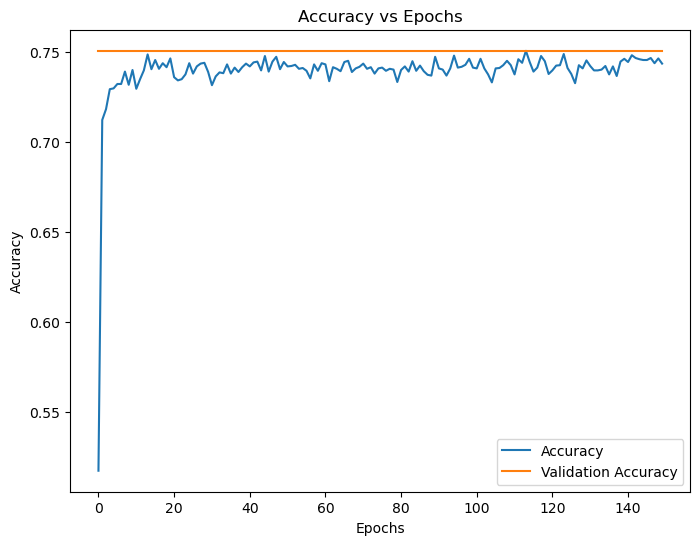

In [26]:
# Plot accuracy vs epochs graph
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

In [27]:
# Preprocessing

features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X = df[features].values
y = df['Churn'].map({'Yes': 1, 'No': 0}).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Model 3 - Hypertuned

model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
# Train the model

history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/150
141/141 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.6523 - val_loss: nan - val_accuracy: 0.7507
Epoch 2/150
141/141 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507
Epoch 3/150
141/141 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507
Epoch 4/150
141/141 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507
Epoch 5/150
141/141 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507
Epoch 6/150
141/141 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507
Epoch 7/150
141/141 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507
Epoch 8/150
141/141 [====================

In [30]:
# Evaluate the model
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

45/45 [==============================] - 0s 2ms/step


In [31]:
#Prediction

confusion_matrix(y_test, y_pred)

array([[1036,    0],
       [ 373,    0]], dtype=int64)

In [32]:
# Accuracy

accuracy_score(y_test, y_pred)

0.7352732434350603

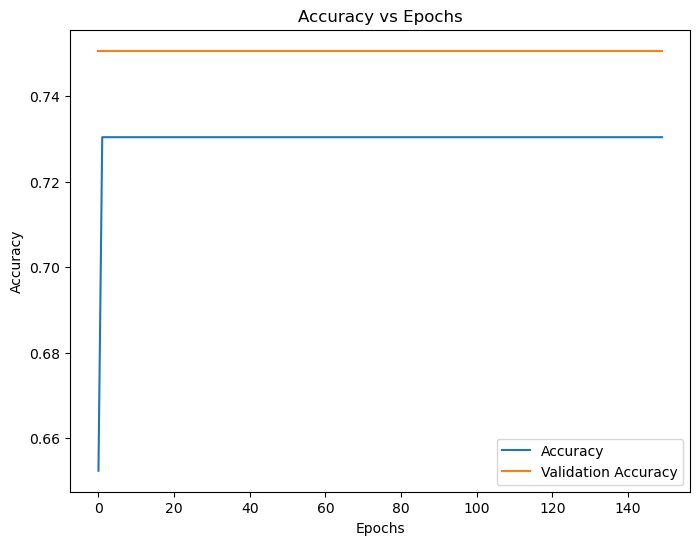

In [33]:
# Plot accuracy vs epochs graph

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

In [34]:
# Conclusion

#The first model gave us a mean validation accuracy of 75.65%, the second model had accuracy of 73.52% and the third model had a mean validation accuracy of 73.52%.
# First model gave the best result of all
